<a href="https://colab.research.google.com/github/RaffyJO/PCVK_Ganjil_2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Raffy Jamil Octavialdy
<br>
Kelas: TI-3D
<br>
NIM: 2241720082**

**Akses folder images pada Google Drive**

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**Transformasi Linier Brightness**

Formula: g(x,y)=f(x,y)+b
<br>
g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, b adalah nilai brightness.

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


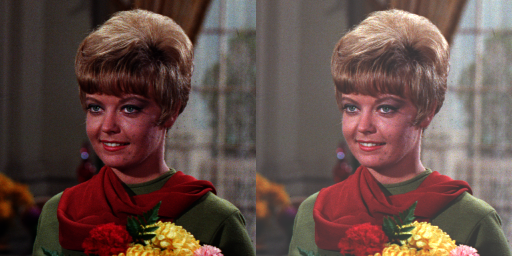

In [7]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**TUGAS PRAKTIKUM**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

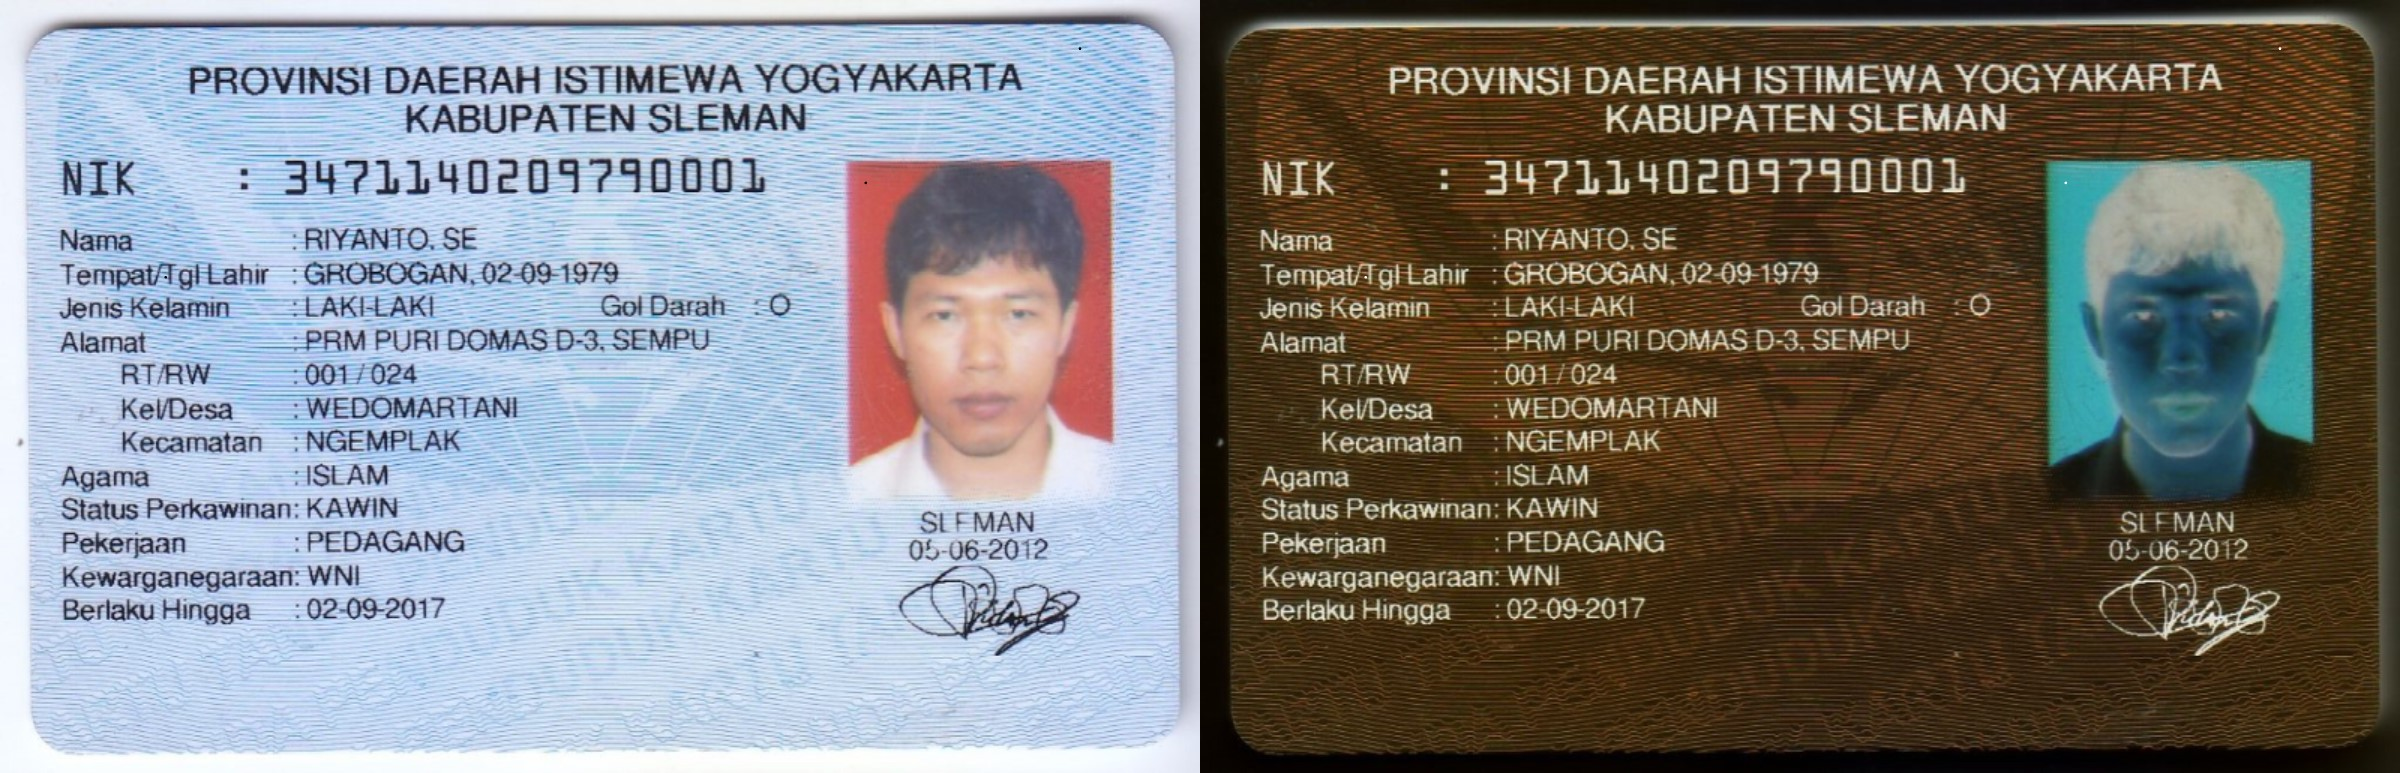

In [11]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/ktp_pvck.jpg')
inverse_image = np.zeros(original.shape, original.dtype)

# akses per pixel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            # Inversi nilai pixel
            inverse_image[y, x, c] = 255 - original[y, x, c]

# cara simple tanpa for loop
# Melakukan inversi gambar menggunakan cv2.bitwise_not
# inverse_image = cv.bitwise_not(original)

final_frame = cv.hconcat((original, inverse_image))
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


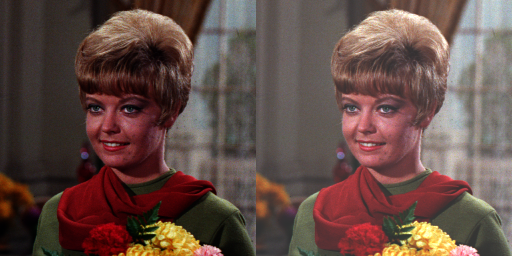

In [18]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = int(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')
  brightness = 0
  contrast = 1.0

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

# Parameter untuk transformasi kontras
F = 259 * (contrast + 255) / (255 * (259 - contrast))

# Menghitung nilai kontras baru untuk setiap pixel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            contrast_image[y, x, c] = np.clip(F * (original[y, x, c] - 128) + 128 + brightness, 0, 255)

# cara simple tanpa for loop
# contrast_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan tingkat kecerahan: 50


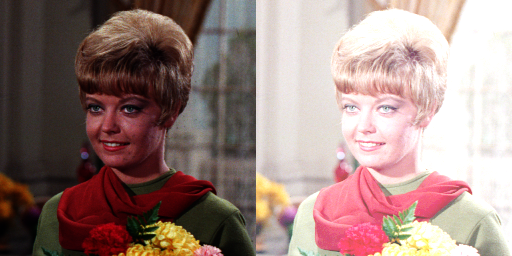

In [27]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')
try:
    brightness = int(input('Masukkan tingkat kecerahan: '))
except ValueError:
    print('Error, not a number')
    brightness = 0

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

# Konstanta c untuk transformasi log
c = 255 / np.log(1 + np.max(original))

# Melakukan transformasi log pada setiap pixel
log_transformed = c * np.log(1 + original)

# Menambahkan tingkat kecerahan setelah transformasi log
log_transformed = log_transformed + brightness

# Normalisasi hasil agar sesuai dengan format citra 8-bit
log_transformed = np.array(np.clip(log_transformed, 0, 255), dtype=np.uint8)

# Menggabungkan citra asli dan hasil transformasi log untuk perbandingan
final_frame = cv.hconcat([original, log_transformed])
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

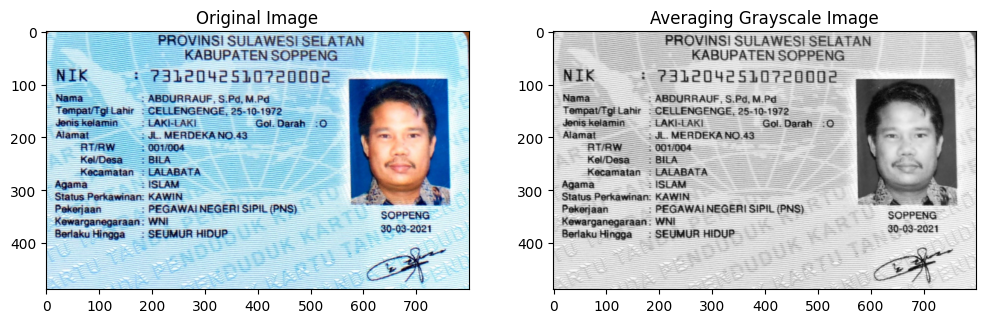

In [46]:
# AVERAGING
# Baca citra berwarna
original = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP7.jpeg')

# Mengonversi citra dari BGR ke RGB untuk penampilan dengan matplotlib
original_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)

# Memisahkan channel warna R, G, dan B
B, G, R = cv.split(original)

# Metode Averaging
gray_averaging = np.mean(original, axis=2).astype(np.uint8)

# Membuat citra grayscale dengan satu channel
# Untuk menampilkan dengan format RGB, stack grayscale ke tiga channel
averaging_image = np.stack([gray_averaging] * 3, axis=-1)

# Mengonversi citra grayscale ke format RGB untuk penampilan
# Averaging_image sebenarnya sudah dalam format RGB setelah stacking
averaging_image_rgb = cv.cvtColor(averaging_image, cv.COLOR_BGR2RGB)


# Menampilkan citra asli dan citra grayscale
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_rgb)

plt.subplot(1, 2, 2)
plt.title('Averaging Grayscale Image')
plt.imshow(averaging_image_rgb)

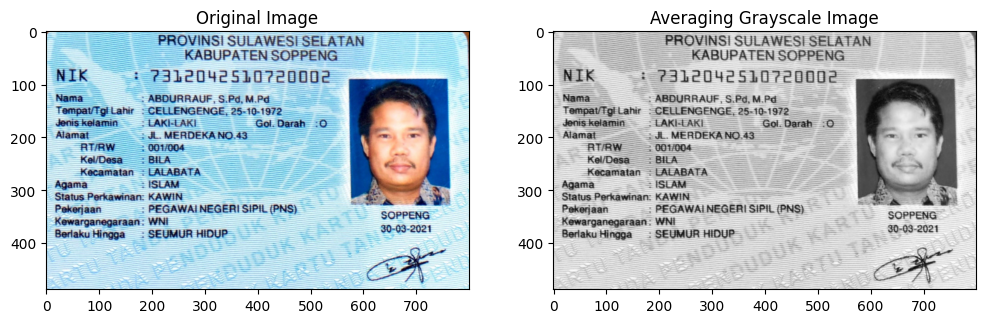

In [73]:
# LIGHTNESS
# Baca citra berwarna
original = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP7.jpeg')

# Mengonversi citra dari BGR ke RGB untuk penampilan dengan matplotlib
original_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)

# Memisahkan channel warna R, G, dan B
B, G, R = cv.split(original)

# Menghitung nilai maksimum dan minimum untuk setiap pixel
max_image = np.maximum(np.maximum(R, G), B)
min_image = np.minimum(np.minimum(R, G), B)

# Menggabungkan max_image dan min_image dalam array baru
max_min_combined = np.array([max_image, min_image])

# Menggunakan np.mean untuk menghitung rata-rata sepanjang axis=0 (Lightness)
gray_averaging = np.mean(max_min_combined, axis=0).astype(np.uint8)

# Membuat citra grayscale dengan satu channel
# Untuk menampilkan dengan format RGB, stack grayscale ke tiga channel
averaging_image = np.stack([gray_averaging] * 3, axis=-1)

# Mengonversi citra grayscale ke format RGB untuk penampilan
# Averaging_image sebenarnya sudah dalam format RGB setelah stacking
averaging_image_rgb = cv.cvtColor(averaging_image, cv.COLOR_BGR2RGB)

# Menampilkan citra asli dan citra grayscale
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_rgb)

plt.subplot(1, 2, 2)
plt.title('Averaging Grayscale Image')
plt.imshow(averaging_image_rgb)

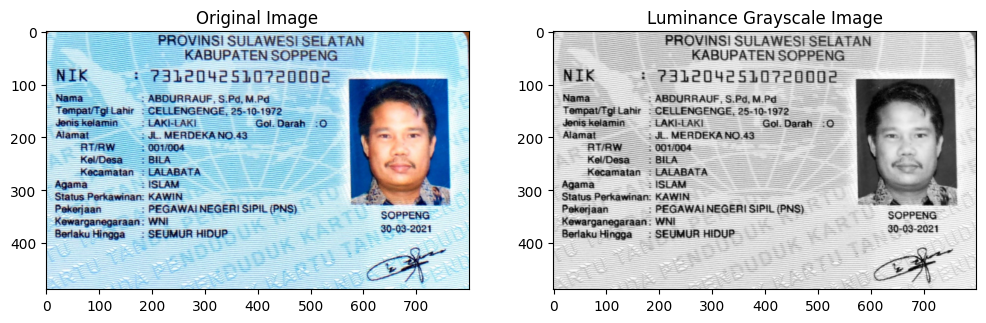

In [52]:
# LUMINANCE
# Baca citra berwarna
original = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP7.jpeg')

# Mengonversi citra dari BGR ke RGB untuk penampilan dengan matplotlib
original_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)

# Memisahkan channel warna R, G, dan B
B, G, R = cv.split(original)

# Menghitung luminance
luminance = (0.21 * R + 0.72 * G + 0.07 * B).astype(np.uint8)

# Membuat citra grayscale dengan satu channel
# Untuk menampilkan dengan format RGB, stack grayscale ke tiga channel
luminance_image = np.stack([luminance] * 3, axis=-1)

# Mengonversi citra grayscale ke format RGB untuk penampilan
# Luminance_image sebenarnya sudah dalam format RGB setelah stacking
luminance_image_rgb = cv.cvtColor(luminance_image, cv.COLOR_BGR2RGB)

# Menampilkan citra asli dan citra grayscale
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_rgb)

plt.subplot(1, 2, 2)
plt.title('Luminance Grayscale Image')
plt.imshow(luminance_image_rgb)
plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

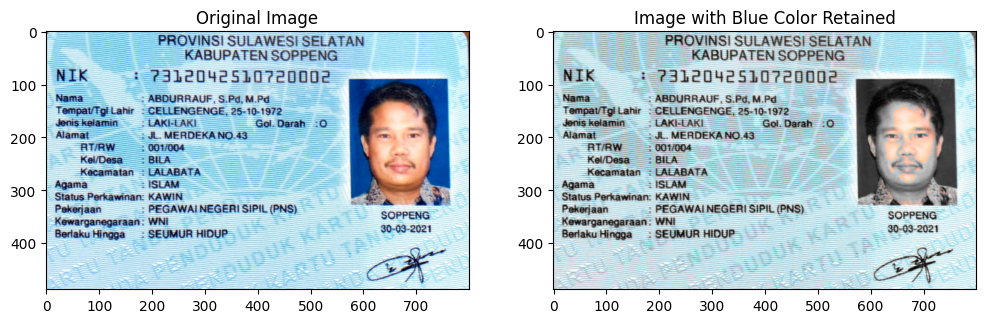

In [69]:
# Baca citra berwarna
original = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP7.jpeg')

# Konversi citra dari BGR ke HSV
hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)

# Menentukan batas bawah dan atas untuk warna biru dalam ruang warna RGB
lower_blue = np.array([0, 0, 100])   # Batas bawah (nilai RGB rendah untuk merah dan hijau, tinggi untuk biru)
upper_blue = np.array([100, 100, 255]) # Batas atas (nilai RGB sedang untuk merah dan hijau, tinggi untuk biru)

# Buat mask untuk warna biru
mask = cv.inRange(hsv, lower_blue, upper_blue)

# Buat citra grayscale
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)

# Ubah grayscale menjadi citra 3 channel agar dapat digabungkan dengan citra berwarna
gray_3_channel = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Gunakan mask untuk mengambil bagian yang berwarna biru
colored_part = cv.bitwise_and(original, original, mask=mask)

# Gunakan mask inverse untuk bagian yang bukan biru dan gabungkan dengan citra grayscale
mask_inverse = cv.bitwise_not(mask)
gray_part = cv.bitwise_and(gray_3_channel, gray_3_channel, mask=mask_inverse)

# Gabungkan bagian berwarna biru dengan bagian grayscale
result = cv.add(colored_part, gray_part)

# Konversi hasil dari BGR ke RGB untuk penampilan dengan matplotlib
result_rgb = cv.cvtColor(result, cv.COLOR_BGR2RGB)

# Menampilkan citra asli dan citra hasil
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Image with Blue Color Retained')
plt.imshow(result_rgb)
plt.show()